In [1]:
#LOAN STATUS PREDICTION

In [2]:
#...Importing The Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing   
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [4]:
#...Find the path to read Data

In [5]:
pwd

'/Users/apple/Desktop/static'

In [6]:
#...Loding the Data

In [7]:
data = pd.read_csv('/Users/apple/Desktop/static/credit_train.csv')

In [8]:
data

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                      ...         ...                  ...   
100509                                   NaN         NaN                  NaN   
100510                                   NaN         NaN                  NaN   
100511                                   NaN         NaN                  NaN   
100512                                   NaN         NaN                  NaN   
100513                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
0       Short Term         709.0      1167493.0              8 years   
1       Short Term           NaN            NaN            10+ years   
2       Short Term         741.0      2231892.0              8 years   
3        Long Term         721.0       806949.0              3 years   
4       Short Term           NaN            NaN              5 years   
...            ...           ...            ...                  ...   
100509         NaN           NaN            NaN                  NaN   
100510         NaN           NaN            NaN                  NaN   
100511         NaN           NaN            NaN                  NaN   
100512         NaN           NaN            NaN                  NaN   
100513         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
0       Home Mortgage   Home Improvements       5214.74   
1       Home Mortgage  Debt Consolidation      33295.98   
2            Own Home  Debt Consolidation      29200.53   
3            Own Home  Debt Consolidation       8741.90   
4                Rent  Debt Consolidation      20639.70   
...               ...                 ...           ...   
100509            NaN                 NaN           NaN   
100510            NaN                 NaN           NaN   
100511            NaN                 NaN           NaN   
100512            NaN                 NaN           NaN   
100513            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           NaN   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                           NaN   
4                           6.1                           NaN   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1       

In [9]:
data.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

  Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [10]:
#...Data Information

In [11]:
data.shape

(100514, 19)

In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [14]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [15]:
#...Lists out the names of the columns 
data.columns    

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [16]:
#...Lists the columns with categorical data
object_train_df=data.select_dtypes(include=['object'])    
object_train_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')

In [17]:
#...Lists the columns with numerical data
num_train_df=data.select_dtypes(include=['int','float'])     
num_train_df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [18]:
#...Statistical Measures

In [19]:
data.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+05  80846.000000   8.084600e+04  100000.000000   
mean          1.176045e+07   1076.456089   1.378277e+06   18472.412336   
std           3.178394e+07   1475.403791   1.081360e+06   12174.992609   
min           1.080200e+04    585.000000   7.662700e+04       0.000000   
25%           1.796520e+05    705.000000   8.488440e+05   10214.162500   
50%           3.122460e+05    724.000000   1.174162e+06   16220.300000   
75%           5.249420e+05    741.000000   1.650663e+06   24012.057500   
max           1.000000e+08   7510.000000   1.655574e+08  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100000.000000                  46859.000000   
mean                 18.199141                     34.901321   
std                   7.015324                     21.997829   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  16.900000                     32.000000   
75%                  21.700000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             100000.00000              100000.000000   
mean                  11.12853                   0.168310   
std                    5.00987                   0.482705   
min                    0.00000                   0.000000   
25%                    8.00000                   0.000000   
50%                   10.00000                   0.000000   
75%                   14.00000                   0.000000   
max                   76.00000                  15.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies     Tax Liens  
count            1.000000e+05         9.999800e+04  99796.000000  99990.000000  
mean             2.946374e+05         7.607984e+05      0.117740      0.029313  
std              3.761709e+05         8.384503e+06      0.351424      0.258182  
min              0.000000e+00         0.000000e+00      0.000000      0.000000  
25%              1.126700e+05         2.734380e+05      0.000000      0.000000  
50%              2.098170e+05         4.678740e+05      0.000000      0.000000  
75%              3.679588e+05         7.829580e+05      0.000000      0.000000  
max              3.287897e+07         1.539738e+09      7.000000     15.000000

In [20]:
#...Finding the missing values

In [21]:
data.isnull().any()

Loan ID                         True
Customer ID                     True
Loan Status                     True
Current Loan Amount             True
Term                            True
Credit Score                    True
Annual Income                   True
Years in current job            True
Home Ownership                  True
Purpose                         True
Monthly Debt                    True
Years of Credit History         True
Months since last delinquent    True
Number of Open Accounts         True
Number of Credit Problems       True
Current Credit Balance          True
Maximum Open Credit             True
Bankruptcies                    True
Tax Liens                       True
dtype: bool

In [22]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [23]:
data['Loan ID'] = data['Loan ID'].fillna(data['Loan ID'].mode()[0])
data['Customer ID'] = data['Customer ID'].fillna(data['Customer ID'].mode()[0])
data['Loan Status'] = data['Loan Status'].fillna(data['Loan Status'].mode()[0])
data['Current Loan Amount'] = data['Current Loan Amount'].fillna(data['Current Loan Amount'].mean())
data['Term'] = data['Term'].fillna(data['Term'].mode()[0])
data['Credit Score'] = data['Credit Score'].fillna(data['Credit Score'].mode()[0])
data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].mode()[0])
data['Years in current job'] = data['Years in current job'].fillna(data['Years in current job'].mode()[0])
data['Home Ownership'] = data['Home Ownership'].fillna(data['Home Ownership'].mode()[0])
data['Purpose'] = data['Purpose'].fillna(data['Purpose'].mode()[0])
data['Monthly Debt'] = data['Monthly Debt'].fillna(data['Monthly Debt'].mode()[0])
data['Years of Credit History'] = data['Years of Credit History'].fillna(data['Years of Credit History'].mode()[0])
data['Months since last delinquent'] = data['Months since last delinquent'].fillna(data['Months since last delinquent'].mode()[0])
data['Number of Open Accounts'] = data['Number of Open Accounts'].fillna(data['Number of Open Accounts'].mode()[0])
data['Number of Credit Problems'] = data['Number of Credit Problems'].fillna(data['Number of Credit Problems'].mode()[0])
data['Current Credit Balance'] = data['Current Credit Balance'].fillna(data['Current Credit Balance'].mode()[0])
data['Maximum Open Credit'] = data['Maximum Open Credit'].fillna(data['Maximum Open Credit'].mode()[0])
data['Bankruptcies'] = data['Bankruptcies'].fillna(data['Bankruptcies'].mode()[0])
data['Tax Liens'] = data['Tax Liens'].fillna(data['Tax Liens'].mode()[0])

In [24]:
data.isnull().any()

Loan ID                         False
Customer ID                     False
Loan Status                     False
Current Loan Amount             False
Term                            False
Credit Score                    False
Annual Income                   False
Years in current job            False
Home Ownership                  False
Purpose                         False
Monthly Debt                    False
Years of Credit History         False
Months since last delinquent    False
Number of Open Accounts         False
Number of Credit Problems       False
Current Credit Balance          False
Maximum Open Credit             False
Bankruptcies                    False
Tax Liens                       False
dtype: bool

In [25]:
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [26]:
#...From the Data to find the Unique ?
#--------------------------------------
#...Data from the credit_train.csv.

In [27]:
type(data)

pandas.core.frame.DataFrame

In [28]:
data['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [29]:
data['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [30]:
data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [31]:
data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [32]:
#...Data Preprocessing 
# 1.Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
data['Loan Status']=le.fit_transform(data['Loan Status'])
data['Term']=le.fit_transform(data['Term'])
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
data['Purpose']=le.fit_transform(data['Purpose'])

In [36]:
data['Loan Status'].unique()

array([1, 0])

In [37]:
data['Term'].unique()

array([1, 0])

In [38]:
data['Home Ownership'].unique()

array([1, 2, 3, 0])

In [39]:
data['Purpose'].unique()

array([ 5,  3,  1, 11,  0,  2,  9,  8,  7, 13,  6, 15, 14,  4, 10, 12])

In [40]:
data.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Loan Status  Current Loan Amount  Term  Credit Score  Annual Income  \
0            1             445412.0     1         709.0      1167493.0   
1            1             262328.0     1         747.0      1162572.0   
2            1           99999999.0     1         741.0      2231892.0   
3            1             347666.0     0         721.0       806949.0   
4            1             176220.0     1         747.0      1162572.0   

  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0              8 years               1        5       5214.74   
1            10+ years               1        3      33295.98   
2              8 years               2        3      29200.53   
3              3 years               2        3       8741.90   
4              5 years               3        3      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                          13.0   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                          13.0   
4                      6.1                          13.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [41]:
#...Visualization Analysis

In [42]:
import matplotlib.pyplot as plt

In [43]:
#loan status is the target column, assigned to be zero here,it gives the count of charged off people
coffvalue = data[data['Loan Status'] == 0]['Loan Status'].count()
#loan status is the target column, assigned to be one here,it gives the count of fully paid people
fpaidvalue = data[data['Loan Status'] == 1]['Loan Status'].count()
data1 = {"Counts":[coffvalue, fpaidvalue] }
statusDF = pd.DataFrame(data1, index=["Charged Off", "Fully Paid"])
# statusDF.head()
statusDF.plot(kind='bar', title="Status of the Loan")

<AxesSubplot:title={'center':'Status of the Loan'}>

In [44]:
# replacing the values in the column[Term] with 0 and 1 in place of short term and long term
data['Term'].replace(("Short Term","Long Term"),(0,1), inplace=True)
data.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Loan Status  Current Loan Amount  Term  Credit Score  Annual Income  \
0            1             445412.0     1         709.0      1167493.0   
1            1             262328.0     1         747.0      1162572.0   
2            1           99999999.0     1         741.0      2231892.0   
3            1             347666.0     0         721.0       806949.0   
4            1             176220.0     1         747.0      1162572.0   

  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0              8 years               1        5       5214.74   
1            10+ years               1        3      33295.98   
2              8 years               2        3      29200.53   
3              3 years               2        3       8741.90   
4              5 years               3        3      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                          13.0   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                          13.0   
4                      6.1                          13.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [45]:
scount = data[data['Term'] == 0]['Term'].count()
lcount = data[data['Term'] ==1]['Term'].count()

data1 = {"Counts":[scount, lcount]}
#gives the count of short and long term
termDF = pd.DataFrame(data1, index=["Short Term", "Long Term"])
termDF.head()

Counts
Short Term   27792
Long Term    72722

In [46]:
#...Displays the sum of null values in credit sccore column
print("There are ", data['Credit Score'].isna().sum(), "null values for Credit score.")

There are  0 null values for Credit score.


In [49]:
plt.scatter(data['Current Credit Balance'],data['Annual Income'],color='green')
plt.xlabel('Current Credit Balance')
plt.ylabel('Annual Income')
plt.title('Relationship between Current Credit Balanceand Annual Income')

Text(0.5, 1.0, 'Relationship between Current Credit Balanceand Annual Income')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

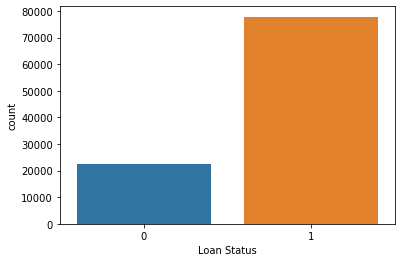

In [50]:
sns.countplot(data['Loan Status'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Term', ylabel='count'>

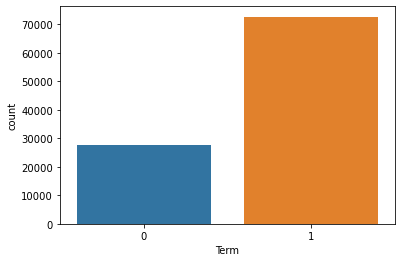

In [51]:
sns.countplot(data['Term'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

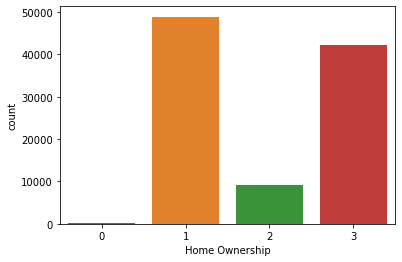

In [52]:
sns.countplot(data['Home Ownership'])

In [53]:
sns.countplot(data['Purpose'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purpose', ylabel='count'>

In [54]:
#...Loan Status & Term
sns.countplot(x='Loan Status',hue='Term',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

In [55]:
#...Loan Status & Home Owership
sns.countplot(x='Loan Status',hue='Home Ownership',data=data)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

<AxesSubplot:xlabel='Purpose', ylabel='count'>

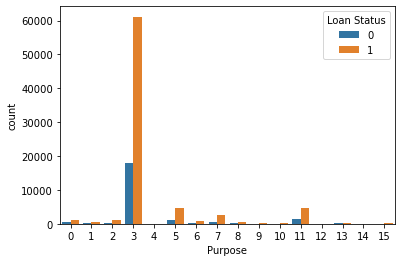

In [56]:
#...Purpose & Loan Status
sns.countplot(x='Purpose',hue='Loan Status',data=data)

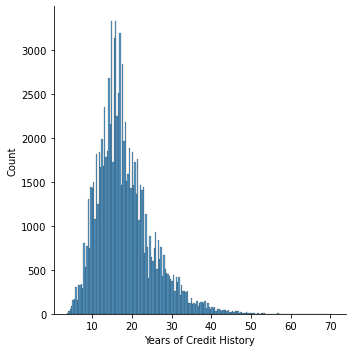

In [57]:
#...Years of Credit History
sns.displot(data['Years of Credit History'])

In [58]:
sns.displot(data['Annual Income'])

In [59]:
sns.displot(data['Credit Score'])

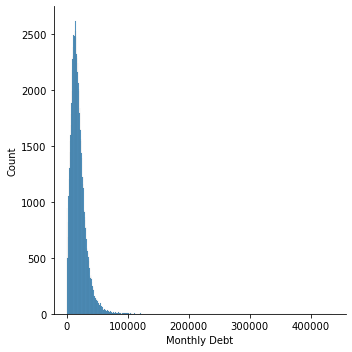

In [60]:
sns.displot(data['Monthly Debt'])

In [61]:
corr = data.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

<AxesSubplot:>

In [62]:
#...Normalizing The Values

In [63]:
x = data.iloc[:,0:8].values

In [64]:
y = data.iloc[:,8:9].values

In [65]:
x

array([['14dd8831-6af5-400b-83ec-68e61888a048',
        '981165ec-3274-42f5-a3b4-d104041a9ca9', 1, ..., 709.0, 1167493.0,
        '8 years'],
       ['4771cc26-131a-45db-b5aa-537ea4ba5342',
        '2de017a3-2e01-49cb-a581-08169e83be29', 1, ..., 747.0, 1162572.0,
        '10+ years'],
       ['4eed4e6a-aa2f-4c91-8651-ce984ee8fb26',
        '5efb2b2b-bf11-4dfd-a572-3761a2694725', 1, ..., 741.0, 2231892.0,
        '8 years'],
       ...,
       ['00069ff1-a877-4d35-81be-7cd359b99956',
        '000877d4-55ed-4126-abda-968f61da7b7f', 1, ..., 747.0, 1162572.0,
        '10+ years'],
       ['00069ff1-a877-4d35-81be-7cd359b99956',
        '000877d4-55ed-4126-abda-968f61da7b7f', 1, ..., 747.0, 1162572.0,
        '10+ years'],
       ['00069ff1-a877-4d35-81be-7cd359b99956',
        '000877d4-55ed-4126-abda-968f61da7b7f', 1, ..., 747.0, 1162572.0,
        '10+ years']], dtype=object)

In [66]:
y

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [1]])

In [67]:
x.ndim

2

In [68]:
y.ndim

2

In [69]:
# 2.One Hot Encoder

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
oh = OneHotEncoder()

In [72]:
o = oh.fit_transform(x[:,4:5]).toarray()

In [73]:
o

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [74]:
x.shape

(100514, 8)

In [75]:
y.shape

(100514, 1)

In [76]:
#...Spliting Data into train and test

In [77]:
#...Specify input and output attributes
#...Normalization

In [78]:
x = data.iloc[:,0:1].values

In [79]:
y = data.iloc[:,1:].values

In [80]:
x

array([['14dd8831-6af5-400b-83ec-68e61888a048'],
       ['4771cc26-131a-45db-b5aa-537ea4ba5342'],
       ['4eed4e6a-aa2f-4c91-8651-ce984ee8fb26'],
       ...,
       ['00069ff1-a877-4d35-81be-7cd359b99956'],
       ['00069ff1-a877-4d35-81be-7cd359b99956'],
       ['00069ff1-a877-4d35-81be-7cd359b99956']], dtype=object)

In [81]:
y

array([['981165ec-3274-42f5-a3b4-d104041a9ca9', 1, 445412.0, ...,
        416746.0, 1.0, 0.0],
       ['2de017a3-2e01-49cb-a581-08169e83be29', 1, 262328.0, ...,
        850784.0, 0.0, 0.0],
       ['5efb2b2b-bf11-4dfd-a572-3761a2694725', 1, 99999999.0, ...,
        750090.0, 0.0, 0.0],
       ...,
       ['000877d4-55ed-4126-abda-968f61da7b7f', 1, 11760447.38946, ...,
        0.0, 0.0, 0.0],
       ['000877d4-55ed-4126-abda-968f61da7b7f', 1, 11760447.38946, ...,
        0.0, 0.0, 0.0],
       ['000877d4-55ed-4126-abda-968f61da7b7f', 1, 11760447.38946, ...,
        0.0, 0.0, 0.0]], dtype=object)

In [82]:
x.ndim

2

In [83]:
y.ndim

2

In [84]:
x.shape

(100514, 1)

In [85]:
y.shape

(100514, 18)

In [86]:
#...Train - Test Split
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 0)

In [88]:
x_train.shape

(80411, 1)

In [89]:
y_train.shape

(80411, 18)

In [90]:
x_test.shape

(20103, 1)

In [91]:
y_test.shape

(20103, 18)

In [92]:
#...Buliding Model
# 1. Linear Regression
# 2. Logistic Regression
# 3. Random Forest Regression Classification
# 4. Decision Tree Regression Classification

In [93]:
#...Linear Regression 

In [94]:
data.head()

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   

   Loan Status  Current Loan Amount  Term  Credit Score  Annual Income  \
0            1             445412.0     1         709.0      1167493.0   
1            1             262328.0     1         747.0      1162572.0   
2            1           99999999.0     1         741.0      2231892.0   
3            1             347666.0     0         721.0       806949.0   
4            1             176220.0     1         747.0      1162572.0   

  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0              8 years               1        5       5214.74   
1            10+ years               1        3      33295.98   
2              8 years               2        3      29200.53   
3              3 years               2        3       8741.90   
4              5 years               3        3      20639.70   

   Years of Credit History  Months since last delinquent  \
0                     17.2                          13.0   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                          13.0   
4                      6.1                          13.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0             416746.0           1.0        0.0  
1             850784.0           0.0        0.0  
2             750090.0           0.0        0.0  
3             386958.0           0.0        0.0  
4             427174.0           0.0        0.0

In [95]:
data.describe()

Loan Status  Current Loan Amount           Term   Credit Score  \
count  100514.000000         1.005140e+05  100514.000000  100514.000000   
mean        0.774768         1.176045e+07       0.723501    1011.990021   
std         0.417737         3.170257e+07       0.447269    1329.642160   
min         0.000000         1.080200e+04       0.000000     585.000000   
25%         1.000000         1.799160e+05       0.000000     711.000000   
50%         1.000000         3.138520e+05       1.000000     733.000000   
75%         1.000000         5.289680e+05       1.000000     747.000000   
max         1.000000         1.000000e+08       1.000000    7510.000000   

       Annual Income  Home Ownership       Purpose   Monthly Debt  \
count   1.005140e+05   100514.000000  100514.00000  100514.000000   
mean    1.336069e+06        1.928786       3.80152   18377.949674   
std     9.735763e+05        0.953926       2.26955   12215.092160   
min     7.662700e+04        0.000000       0.00000       0.000000   
25%     9.324250e+05        1.000000       3.00000   10111.230000   
50%     1.162572e+06        2.000000       3.00000   16150.570000   
75%     1.509968e+06        3.000000       3.00000   23959.475000   
max     1.655574e+08        3.000000      15.00000  435843.280000   

       Years of Credit History  Months since last delinquent  \
count            100514.000000                 100514.000000   
mean                 18.187895                     23.210259   
std                   6.999121                     18.573116   
min                   3.600000                      0.000000   
25%                  13.500000                     13.000000   
50%                  16.900000                     13.000000   
75%                  21.600000                     29.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count            100514.000000              100514.000000   
mean                 11.117645                   0.167449   
std                   4.999350                   0.481619   
min                   0.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  76.000000                  15.000000   

       Current Credit Balance  Maximum Open Credit   Bankruptcies  \
count            1.005140e+05         1.005140e+05  100514.000000   
mean             2.931307e+05         7.568927e+05       0.116899   
std              3.757960e+05         8.363131e+06       0.350307   
min              0.000000e+00         0.000000e+00       0.000000   
25%              1.113020e+05         2.706660e+05       0.000000   
50%              2.085440e+05         4.656740e+05       0.000000   
75%              3.666572e+05         7.804280e+05       0.000000   
max              3.287897e+07         1.539738e+09       7.000000   

           Tax Liens  
count  100514.000000  
mean        0.029160  
std         0.257517  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        15.000000

In [96]:
#... Normalizing The Values

In [97]:
x = data.iloc[:,2:3].values

In [98]:
y = data.iloc[:,4:6].values

In [99]:
x

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [100]:
y

array([[  1., 709.],
       [  1., 747.],
       [  1., 741.],
       ...,
       [  1., 747.],
       [  1., 747.],
       [  1., 747.]])

In [101]:
x.ndim

2

In [102]:
y.ndim

2

In [103]:
x.shape

(100514, 1)

In [104]:
y.shape

(100514, 2)

In [105]:
#...Train - Test Split

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 0)

In [107]:
x_train.shape

(80411, 1)

In [108]:
y_train.shape

(80411, 2)

In [109]:
x_test.shape

(20103, 1)

In [110]:
y_test.shape

(20103, 2)

In [111]:
#...Performing Linear Regression
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()

In [113]:
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
#...Predication

In [115]:
y_pred = lr.predict(x_test)

In [116]:
y_pred

array([[6.33388339e-01, 2.00995864e+03],
       [7.49883499e-01, 7.23244332e+02],
       [7.49883499e-01, 7.23244332e+02],
       ...,
       [6.33388339e-01, 2.00995864e+03],
       [7.49883499e-01, 7.23244332e+02],
       [7.49883499e-01, 7.23244332e+02]])

In [117]:
#...Sklearn metrics

In [118]:
from sklearn.metrics import r2_score

In [119]:
accuracy = r2_score(y_test,y_pred)

In [120]:
accuracy

0.08777529898806685

In [121]:
#...Total Accuracy 
accuracy*100

8.777529898806685

In [122]:
#...Predication score

In [123]:
y_pred_Scores = lr.predict([[15]])

In [124]:
y_pred_Scores

array([[ 2.38081573e+00, -1.72907559e+04]])

In [125]:
lr.intercept_ 

array([6.33388339e-01, 2.00995864e+03])

In [126]:
lr.coef_

array([[ 1.1649516e-01],
       [-1.2867143e+03]])

In [127]:
#...Decision Tree and Random Forest Classification

In [128]:
data

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509  00069ff1-a877-4d35-81be-7cd359b99956   
100510  00069ff1-a877-4d35-81be-7cd359b99956   
100511  00069ff1-a877-4d35-81be-7cd359b99956   
100512  00069ff1-a877-4d35-81be-7cd359b99956   
100513  00069ff1-a877-4d35-81be-7cd359b99956   

                                 Customer ID  Loan Status  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9            1   
1       2de017a3-2e01-49cb-a581-08169e83be29            1   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725            1   
3       e777faab-98ae-45af-9a86-7ce5b33b1011            1   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e            1   
...                                      ...          ...   
100509  000877d4-55ed-4126-abda-968f61da7b7f            1   
100510  000877d4-55ed-4126-abda-968f61da7b7f            1   
100511  000877d4-55ed-4126-abda-968f61da7b7f            1   
100512  000877d4-55ed-4126-abda-968f61da7b7f            1   
100513  000877d4-55ed-4126-abda-968f61da7b7f            1   

        Current Loan Amount  Term  Credit Score  Annual Income  \
0              4.454120e+05     1         709.0      1167493.0   
1              2.623280e+05     1         747.0      1162572.0   
2              1.000000e+08     1         741.0      2231892.0   
3              3.476660e+05     0         721.0       806949.0   
4              1.762200e+05     1         747.0      1162572.0   
...                     ...   ...           ...            ...   
100509         1.176045e+07     1         747.0      1162572.0   
100510         1.176045e+07     1         747.0      1162572.0   
100511         1.176045e+07     1         747.0      1162572.0   
100512         1.176045e+07     1         747.0      1162572.0   
100513         1.176045e+07     1         747.0      1162572.0   

       Years in current job  Home Ownership  Purpose  Monthly Debt  \
0                   8 years               1        5       5214.74   
1                 10+ years               1        3      33295.98   
2                   8 years               2        3      29200.53   
3                   3 years               2        3       8741.90   
4                   5 years               3        3      20639.70   
...                     ...             ...      ...           ...   
100509            10+ years               1        3          0.00   
100510            10+ years               1        3          0.00   
100511            10+ years               1        3          0.00   
100512            10+ years               1        3          0.00   
100513            10+ years               1        3          0.00   

        Years of Credit History  Months since last delinquent  \
0                          17.2                          13.0   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                          13.0   
4                           6.1                          13.0   
...                         ...                           ...   
100509                     16.0                          13.0   
100510                     16.0                          13.0   
100511                     16.0                          13.0   
100512                     16.0                          13.0   
100513                     16.0                          13.0   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1                          35.0                        0.0   
2                          18.0                        1.0   
3                           9.0                        0.0   
4 

In [129]:
data['Loan Status'].unique()

array([1, 0])

In [130]:
A = data['Loan Status'].value_counts()

In [131]:
A

1    77875
0    22639
Name: Loan Status, dtype: int64

In [132]:
A[0]

22639

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100514 non-null  object 
 1   Customer ID                   100514 non-null  object 
 2   Loan Status                   100514 non-null  int64  
 3   Current Loan Amount           100514 non-null  float64
 4   Term                          100514 non-null  int64  
 5   Credit Score                  100514 non-null  float64
 6   Annual Income                 100514 non-null  float64
 7   Years in current job          100514 non-null  object 
 8   Home Ownership                100514 non-null  int64  
 9   Purpose                       100514 non-null  int64  
 10  Monthly Debt                  100514 non-null  float64
 11  Years of Credit History       100514 non-null  float64
 12  Months since last delinquent  100514 non-nul

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
le=LabelEncoder()

In [136]:
data['Loan Status']=le.fit_transform(data['Loan Status'])
data['Loan ID']=le.fit_transform(data['Loan ID'])
data['Customer ID']=le.fit_transform(data['Customer ID'])
data['Current Loan Amount']=le.fit_transform(data['Current Loan Amount'])
data['Term']=le.fit_transform(data['Term'])
data['Credit Score']=le.fit_transform(data['Credit Score'])
data['Annual Income']=le.fit_transform(data['Annual Income'])
data['Years in current job']=le.fit_transform(data['Years in current job'])
data['Home Ownership']=le.fit_transform(data['Home Ownership'])
data['Purpose']=le.fit_transform(data['Purpose'])
data['Monthly Debt']=le.fit_transform(data['Monthly Debt'])
data['Years of Credit History']=le.fit_transform(data['Years of Credit History'])
data['Months since last delinquent']=le.fit_transform(data['Months since last delinquent'])
data['Number of Open Accounts']=le.fit_transform(data['Number of Open Accounts'])
data['Number of Credit Problems']=le.fit_transform(data['Number of Credit Problems'])
data['Current Credit Balance']=le.fit_transform(data['Current Credit Balance'])
data['Maximum Open Credit']=le.fit_transform(data['Maximum Open Credit'])
data['Bankruptcies']=le.fit_transform(data['Bankruptcies'])
data['Tax Liens']=le.fit_transform(data['Tax Liens'])

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Loan ID                       100514 non-null  int64
 1   Customer ID                   100514 non-null  int64
 2   Loan Status                   100514 non-null  int64
 3   Current Loan Amount           100514 non-null  int64
 4   Term                          100514 non-null  int64
 5   Credit Score                  100514 non-null  int64
 6   Annual Income                 100514 non-null  int64
 7   Years in current job          100514 non-null  int64
 8   Home Ownership                100514 non-null  int64
 9   Purpose                       100514 non-null  int64
 10  Monthly Debt                  100514 non-null  int64
 11  Years of Credit History       100514 non-null  int64
 12  Months since last delinquent  100514 non-null  int64
 13  Number of Open

In [138]:
data

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  \
0          6697        48724            1                15464     1   
1         23041        14688            1                 8947     1   
2         25441        30541            1                22004     1   
3         38341        74173            1                12149     0   
4         68058        41470            1                 5418     1   
...         ...          ...          ...                  ...   ...   
100509        7            8            1                22003     1   
100510        7            8            1                22003     1   
100511        7            8            1                22003     1   
100512        7            8            1                22003     1   
100513        7            8            1                22003     1   

        Credit Score  Annual Income  Years in current job  Home Ownership  \
0                124          16432                     8               1   
1                162          16323                     1               1   
2                156          30418                     8               2   
3                136           8588                     3               2   
4                162          16323                     5               3   
...              ...            ...                   ...             ...   
100509           162          16323                     1               1   
100510           162          16323                     1               1   
100511           162          16323                     1               1   
100512           162          16323                     1               1   
100513           162          16323                     1               1   

        Purpose  Monthly Debt  Years of Credit History  \
0             5          6148                      136   
1             3         57986                      175   
2             3         54370                      113   
3             3         13243                       84   
4             3         41455                       25   
...         ...           ...                      ...   
100509        3             0                      124   
100510        3             0                      124   
100511        3             0                      124   
100512        3             0                      124   
100513        3             0                      124   

        Months since last delinquent  Number of Open Accounts  \
0                                 13                        6   
1                                  8                       35   
2                                 29                       18   
3                                 13                        9   
4                                 13                       15   
...                              ...                      ...   
100509                            13                        9   
100510                            13                        9   
100511                            13                        9   
100512                            13                        9   
100513                            13                        9   

        Number of Credit Problems  Current Credit Balance  \
0                               1                   11609   
1                               0                   11699   
2                               1                   15038   
3                               0                   13012   
4                               0                   12866   
...                           ...                     ...   
100509                          0                       0   
100510                          0                       0   
100511                          0                       0   
100512                          0                       0   
100513                          0                       0   

       

In [139]:
data.head()

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  Credit Score  \
0     6697        48724            1                15464     1           124   
1    23041        14688            1                 8947     1           162   
2    25441        30541            1                22004     1           156   
3    38341        74173            1                12149     0           136   
4    68058        41470            1                 5418     1           162   

   Annual Income  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0          16432                     8               1        5          6148   
1          16323                     1               1        3         57986   
2          30418                     8               2        3         54370   
3           8588                     3               2        3         13243   
4          16323                     5               3        3         41455   

   Years of Credit History  Months since last delinquent  \
0                      136                            13   
1                      175                             8   
2                      113                            29   
3                       84                            13   
4                       25                            13   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                   11609   
1                       35                          0                   11699   
2                       18                          1                   15038   
3                        9                          0                   13012   
4                       15                          0                   12866   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0                14502             1          0  
1                29190             0          0  
2                26396             0          0  
3                13285             0          0  
4                14922             0          0

In [140]:
data.tail()

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  \
100509        7            8            1                22003     1   
100510        7            8            1                22003     1   
100511        7            8            1                22003     1   
100512        7            8            1                22003     1   
100513        7            8            1                22003     1   

        Credit Score  Annual Income  Years in current job  Home Ownership  \
100509           162          16323                     1               1   
100510           162          16323                     1               1   
100511           162          16323                     1               1   
100512           162          16323                     1               1   
100513           162          16323                     1               1   

        Purpose  Monthly Debt  Years of Credit History  \
100509        3             0                      124   
100510        3             0                      124   
100511        3             0                      124   
100512        3             0                      124   
100513        3             0                      124   

        Months since last delinquent  Number of Open Accounts  \
100509                            13                        9   
100510                            13                        9   
100511                            13                        9   
100512                            13                        9   
100513                            13                        9   

        Number of Credit Problems  Current Credit Balance  \
100509                          0                       0   
100510                          0                       0   
100511                          0                       0   
100512                          0                       0   
100513                          0                       0   

        Maximum Open Credit  Bankruptcies  Tax Liens  
100509                    0             0          0  
100510                    0             0          0  
100511                    0             0          0  
100512                    0             0          0  
100513                    0             0          0

In [141]:
data.corr()

Loan ID  Customer ID  Loan Status  \
Loan ID                       1.000000     0.018883     0.000118   
Customer ID                   0.018883     1.000000    -0.003362   
Loan Status                   0.000118    -0.003362     1.000000   
Current Loan Amount          -0.015658    -0.009300     0.076744   
Term                         -0.007202    -0.009949     0.112159   
Credit Score                 -0.001151    -0.006688    -0.279193   
Annual Income                 0.005394     0.006770     0.078212   
Years in current job          0.003254     0.001499    -0.009328   
Home Ownership                0.009165     0.000655    -0.055831   
Purpose                       0.000917     0.001592    -0.001179   
Monthly Debt                  0.017061     0.020201    -0.016941   
Years of Credit History       0.003215     0.011110     0.022899   
Months since last delinquent  0.004184     0.002675     0.011586   
Number of Open Accounts       0.003136     0.000956    -0.012948   
Number of Credit Problems     0.003457     0.007009    -0.003345   
Current Credit Balance        0.014688     0.012853    -0.007262   
Maximum Open Credit           0.015514     0.010689     0.037317   
Bankruptcies                  0.003046     0.005448     0.005676   
Tax Liens                    -0.002217     0.003142    -0.010821   

                              Current Loan Amount      Term  Credit Score  \
Loan ID                                 -0.015658 -0.007202     -0.001151   
Customer ID                             -0.009300 -0.009949     -0.006688   
Loan Status                              0.076744  0.112159     -0.279193   
Current Loan Amount                      1.000000 -0.308534     -0.095465   
Term                                    -0.308534  1.000000      0.233683   
Credit Score                            -0.095465  0.233683      1.000000   
Annual Income                            0.365779 -0.145074     -0.041801   
Years in current job                    -0.033408  0.011289      0.000606   
Home Ownership                          -0.164601  0.112296     -0.009361   
Purpose                                 -0.152442  0.052336     -0.053078   
Monthly Debt                             0.324456 -0.186309     -0.055847   
Years of Credit History                  0.128328 -0.042559      0.034932   
Months since last delinquent            -0.023646  0.007862     -0.025953   
Number of Open Accounts                  0.158404 -0.083926     -0.013725   
Number of Credit Problems               -0.064086  0.025025     -0.030155   
Current Credit Balance                   0.352821 -0.169558     -0.014717   
Maximum Open Credit                      0.339930 -0.143430      0.053532   
Bankruptcies                            -0.080116  0.027422     -0.025756   
Tax Liens                                0.011237  0.002955     -0.009145   

                              Annual Income  Years in current job  \
Loan ID                            0.005394              0.003254   
Customer ID                        0.006770              0.001499   
Loan Status                        0.078212             -0.009328   
Current Loan Amount                0.365779             -0.033408   
Term                              -0.145074              0.011289   
Credit Score                      -0.041801              0.000606   
Annual Income                      1.000000             -0.036834   
Years in current job              -0.036834              1.000000   
Home Ownership                    -0.244648              0.079916   
Purpose                           -0.031778              0.003099   
Monthly Debt                       0.534448             -0.035280   
Years of Credit History            0.206402             -0.132150   
Months since last delinquent       0.012009             -0.009981   
Number of Open Accounts            0.207478             -0.012193   
Number of Credit Problems         -0.021238             -0.023154   
Current Credit Balance   

<AxesSubplot:>

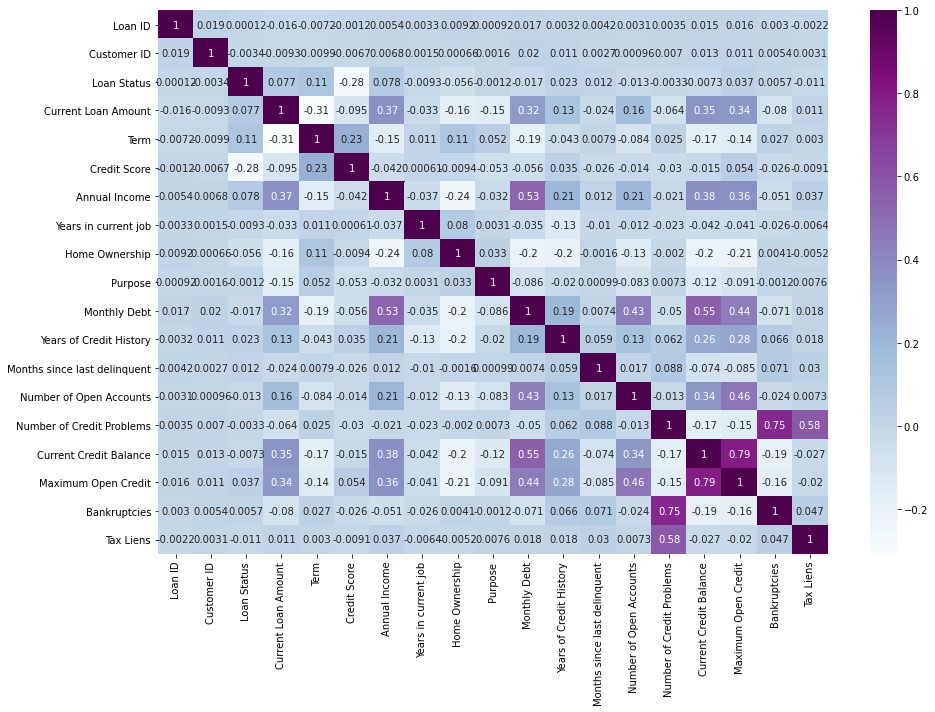

In [142]:
corr = data.corr() 
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

In [143]:
data['Term'].value_counts()

1    72722
0    27792
Name: Term, dtype: int64

In [144]:
data['Loan Status'].value_counts()

1    77875
0    22639
Name: Loan Status, dtype: int64

In [145]:
data['Home Ownership'].value_counts()

1    48924
3    42194
2     9182
0      214
Name: Home Ownership, dtype: int64

In [146]:
data.head(1)

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  Credit Score  \
0     6697        48724            1                15464     1           124   

   Annual Income  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0          16432                     8               1        5          6148   

   Years of Credit History  Months since last delinquent  \
0                      136                            13   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                   11609   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0                14502             1          0

In [147]:
#...Normalization

In [148]:
x =data.iloc[:,[0,4,5,7]].head(2)

In [149]:
x

Loan ID  Term  Credit Score  Years in current job
0     6697     1           124                     8
1    23041     1           162                     1

In [150]:
x = data.iloc[:,0:10].values
x

array([[ 6697, 48724,     1, ...,     8,     1,     5],
       [23041, 14688,     1, ...,     1,     1,     3],
       [25441, 30541,     1, ...,     8,     2,     3],
       ...,
       [    7,     8,     1, ...,     1,     1,     3],
       [    7,     8,     1, ...,     1,     1,     3],
       [    7,     8,     1, ...,     1,     1,     3]])

In [151]:
y=data.iloc[:,-1:].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [152]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [153]:
M = oh.fit_transform(x[:,4:5]).toarray()
N = oh.fit_transform(x[:,8:9]).toarray()

In [154]:
M

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [155]:
N

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [156]:
import numpy as np

In [157]:
x = np.delete(x,[4,5],axis=1)

In [158]:
x.shape

(100514, 8)

In [159]:
#...Train and Test

In [160]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [161]:
x_train.shape

(80411, 8)

In [162]:
x_test.shape

(20103, 8)

In [163]:
y_train.shape

(80411, 1)

In [164]:
y_test.shape

(20103, 1)

In [165]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [166]:
x_train

array([[ 1.54744317,  0.75546861,  0.54049733, ..., -0.83274554,
        -0.97471399,  3.16747134],
       [ 1.36752283, -1.19536773, -1.85014791, ...,  1.06737699,
        -0.97471399, -0.3532195 ],
       [ 1.68199486,  0.61385701,  0.54049733, ...,  1.06737699,
         1.12094715,  3.16747134],
       ...,
       [-0.10746274, -1.34315645, -1.85014791, ...,  0.75068991,
        -0.97471399, -0.3532195 ],
       [-0.26448871, -0.58891711,  0.54049733, ...,  2.01743826,
         1.12094715, -0.3532195 ],
       [ 0.3379903 , -0.01284785,  0.54049733, ..., -0.51605845,
         1.12094715, -0.3532195 ]])

In [167]:
#...Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
log = LogisticRegression()

In [170]:
log.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_pred_log = log.predict(x_test)

In [172]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
cm = confusion_matrix(y_test,y_pred_log)

In [176]:
cm

array([[19690,     0,     0,     0,     0,     0,     0,     0],
       [  286,     0,     0,     0,     0,     0,     0,     0],
       [   73,     0,     0,     0,     0,     0,     0,     0],
       [   23,     0,     0,     0,     0,     0,     0,     0],
       [   20,     0,     0,     0,     0,     0,     0,     0],
       [    5,     0,     0,     0,     0,     0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0,     0],
       [    2,     0,     0,     0,     0,     0,     0,     0]])

In [177]:
#...Decision Tree Classification

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')

In [179]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [180]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [182]:
from sklearn.metrics import accuracy_score

In [183]:
accuracy_score(y_pred,y_test)

0.9628911107794856

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
cm=confusion_matrix(y_test,y_pred)

In [186]:
cm

array([[19294,   286,    73,    21,    11,     0,     2,     2,     1],
       [  243,    43,     0,     0,     0,     0,     0,     0,     0],
       [   58,     0,    15,     0,     0,     0,     0,     0,     0],
       [   21,     0,     0,     2,     0,     0,     0,     0,     0],
       [   18,     0,     0,     0,     2,     0,     0,     0,     0],
       [    4,     0,     0,     0,     0,     1,     0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0,     0,     0],
       [    2,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0]])

In [187]:
data.head(1)

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  Credit Score  \
0     6697        48724            1                15464     1           124   

   Annual Income  Years in current job  Home Ownership  Purpose  Monthly Debt  \
0          16432                     8               1        5          6148   

   Years of Credit History  Months since last delinquent  \
0                      136                            13   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                        6                          1                   11609   

   Maximum Open Credit  Bankruptcies  Tax Liens  
0                14502             1          0

In [188]:
#...Random Forest Classification

In [189]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_leaf_nodes=7)

In [190]:
rfc.fit(x_train,y_train)

<ipython-input-190-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7)

In [191]:
rfc.fit(x_train,y_train)

<ipython-input-191-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=7)

In [192]:
y_pred_rfc = rfc.predict(x_test)

In [193]:
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [195]:
accuracy_score(y_test,y_pred_rfc)

0.9794558026165249

In [196]:
confusion_matrix(y_test,y_pred_rfc)

array([[19690,     0,     0,     0,     0,     0,     0,     0],
       [  286,     0,     0,     0,     0,     0,     0,     0],
       [   73,     0,     0,     0,     0,     0,     0,     0],
       [   23,     0,     0,     0,     0,     0,     0,     0],
       [   20,     0,     0,     0,     0,     0,     0,     0],
       [    5,     0,     0,     0,     0,     0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0,     0],
       [    2,     0,     0,     0,     0,     0,     0,     0]])

In [197]:
#...Decision Tree Regressor

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
dtr = DecisionTreeRegressor(max_depth=7,max_features=6,max_leaf_nodes=10)

In [200]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=6, max_leaf_nodes=10)

In [201]:
ydtr=dtr.predict(x_test)

In [202]:
ydtr

array([0.02632057, 0.02632057, 0.02632057, ..., 0.02632057, 0.02632057,
       0.02632057])

In [203]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [204]:
from sklearn.metrics import r2_score
accuracydtr = r2_score(y_test,ydtr)
accuracydtr*100

0.08980550097037465

In [205]:
#...Tree Structure formation by using Graphviz

In [206]:
from sklearn import tree
tree.export_graphviz(dtr)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[4] <= 1.905\\nmse = 0.062\\nsamples = 80411\\nvalue = 0.028"] ;\n1 [label="mse = 0.056\\nsamples = 77050\\nvalue = 0.026"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 1.728\\nmse = 0.194\\nsamples = 3361\\nvalue = 0.074"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= -0.655\\nmse = 0.193\\nsamples = 3360\\nvalue = 0.074"] ;\n2 -> 3 ;\n5 [label="X[4] <= 2.166\\nmse = 0.311\\nsamples = 526\\nvalue = 0.141"] ;\n3 -> 5 ;\n7 [label="X[1] <= -1.631\\nmse = 0.198\\nsamples = 406\\nvalue = 0.094"] ;\n5 -> 7 ;\n9 [label="X[4] <= 1.945\\nmse = 1.91\\nsamples = 12\\nvalue = 0.583"] ;\n7 -> 9 ;\n11 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.0"] ;\n9 -> 11 ;\n12 [label="mse = 0.149\\nsamples = 11\\nvalue = 0.182"] ;\n9 -> 12 ;\n10 [label="X[1] <= 1.548\\nmse = 0.138\\nsamples = 394\\nvalue = 0.079"] ;\n7 -> 10 ;\n15 [label="mse = 0.092\\nsamples = 383\\nvalue = 0.065"] ;

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


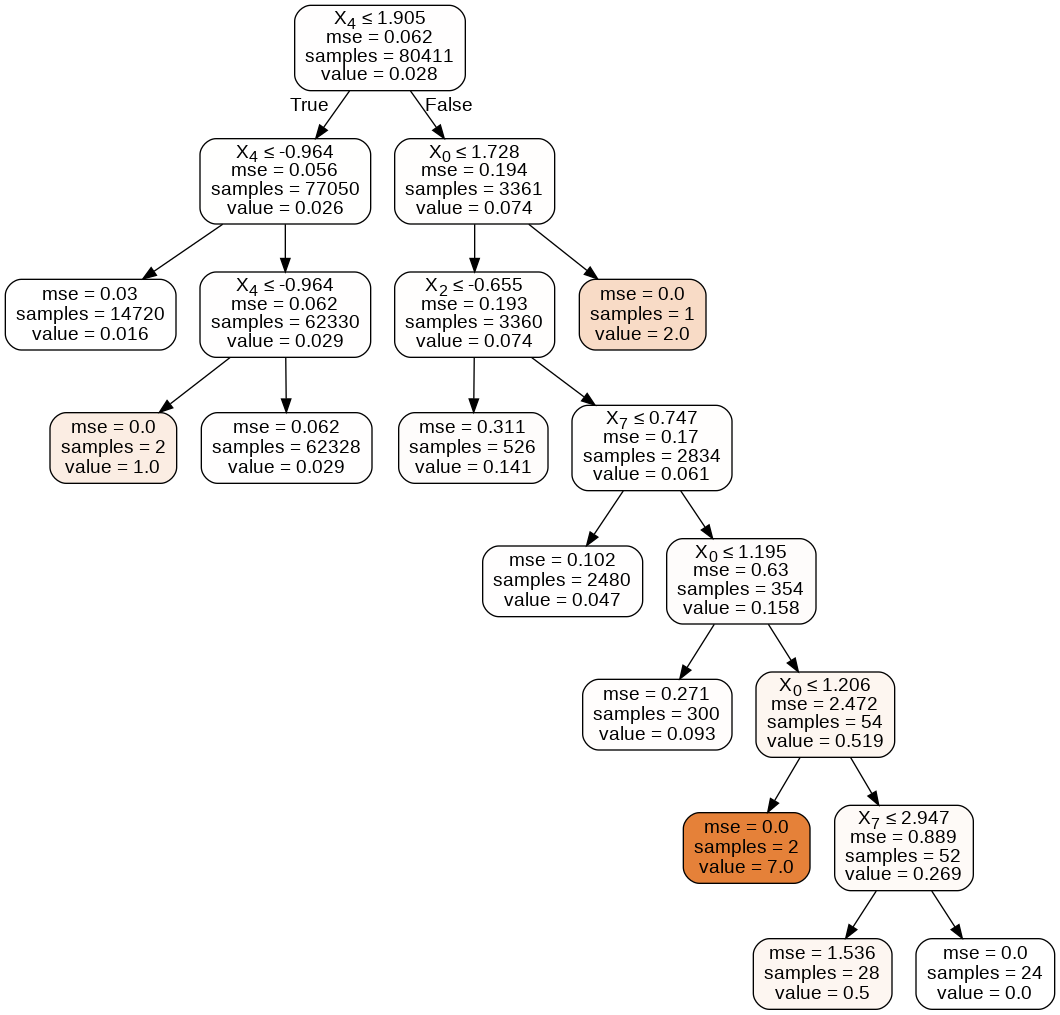

In [276]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dtr,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [207]:
#...Random Forest Regressor

In [208]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
rdr=RandomForestRegressor(n_estimators=30)

In [210]:
rdr.fit(x_train,y_train)

<ipython-input-210-6d5abf051503>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=30)

In [211]:
yrdr = rdr.predict(x_test)

In [212]:
yrdr

array([0.        , 0.        , 0.        , ..., 0.06666667, 0.13333333,
       0.        ])

In [213]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [214]:
data

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term  \
0          6697        48724            1                15464     1   
1         23041        14688            1                 8947     1   
2         25441        30541            1                22004     1   
3         38341        74173            1                12149     0   
4         68058        41470            1                 5418     1   
...         ...          ...          ...                  ...   ...   
100509        7            8            1                22003     1   
100510        7            8            1                22003     1   
100511        7            8            1                22003     1   
100512        7            8            1                22003     1   
100513        7            8            1                22003     1   

        Credit Score  Annual Income  Years in current job  Home Ownership  \
0                124          16432                     8               1   
1                162          16323                     1               1   
2                156          30418                     8               2   
3                136           8588                     3               2   
4                162          16323                     5               3   
...              ...            ...                   ...             ...   
100509           162          16323                     1               1   
100510           162          16323                     1               1   
100511           162          16323                     1               1   
100512           162          16323                     1               1   
100513           162          16323                     1               1   

        Purpose  Monthly Debt  Years of Credit History  \
0             5          6148                      136   
1             3         57986                      175   
2             3         54370                      113   
3             3         13243                       84   
4             3         41455                       25   
...         ...           ...                      ...   
100509        3             0                      124   
100510        3             0                      124   
100511        3             0                      124   
100512        3             0                      124   
100513        3             0                      124   

        Months since last delinquent  Number of Open Accounts  \
0                                 13                        6   
1                                  8                       35   
2                                 29                       18   
3                                 13                        9   
4                                 13                       15   
...                              ...                      ...   
100509                            13                        9   
100510                            13                        9   
100511                            13                        9   
100512                            13                        9   
100513                            13                        9   

        Number of Credit Problems  Current Credit Balance  \
0                               1                   11609   
1                               0                   11699   
2                               1                   15038   
3                               0                   13012   
4                               0                   12866   
...                           ...                     ...   
100509                          0                       0   
100510                          0                       0   
100511                          0                       0   
100512                          0                       0   
100513                          0                       0   

       

In [215]:
#...Applying lamda function
data['Credit Score'] = data['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [216]:
do_nothing = lambda: None
cscoredf = data[data['Term']==0]
stermAVG = cscoredf['Credit Score'].mean()
lscoredf = data[data['Term']==1]
ltermAVG = lscoredf['Credit Score'].mean()
data.loc[(data.Term ==0) & (data['Credit Score'].isnull()),'Credit Score'] = stermAVG
data.loc[(data.Term ==1) & (data['Credit Score'].isnull()),'Credit Score'] = ltermAVG

In [218]:
#...For the credit score column applying conditions for the possible outcomes
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Poor" if np.isreal(val)
                                                  and val < 580 else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Average" if np.isreal(val)
                                                  and (val >= 580 and val < 670) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Good" if np.isreal(val) 
                                                  and (val >= 670 and val < 740) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) 
                                                  and (val >= 740 and val < 800) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) 
                                                  and (val >= 800 and val <= 850) else val)

In [219]:
#...Annual Income Column

In [220]:
#...prints the sum of null values of the column Annual Income
print("There are",data['Annual Income'].isna().sum(), "Missing Annual Income Values.")

There are 0 Missing Annual Income Values.


In [221]:
data.shape 

(100514, 19)

In [222]:
from collections import Counter as c
print(c(data['Credit Score']))  #returns the class count values 

Counter({'Poor': 100514})


In [ ]:
#...Home Ownership Column

In [223]:
print(c(data['Home Ownership']))
data['Home Ownership'] = le.fit_transform(data['Home Ownership'])
print(c(data['Home Ownership']))

Counter({1: 48924, 3: 42194, 2: 9182, 0: 214})
Counter({1: 48924, 3: 42194, 2: 9182, 0: 214})


In [224]:
#...Credit Problems

In [226]:
data['Credit Problems'] = data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 
                        else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [227]:
print(c(data['Credit Problems']))
data['Credit Problems'] = le.fit_transform(data['Credit Problems'])
print(c(data['Credit Problems']))

Counter({'No Credit Problem': 86549, 'Some Credit promblem': 13879, 'Major Credit Problems': 86})
Counter({1: 86549, 2: 13879, 0: 86})


In [ ]:
#...Credit Age

In [228]:
data['Credit Age'] = data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 
                                else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [229]:
print(c(data['Credit Age']))
data['Credit Age'] = le.fit_transform(data['Credit Age'])
print(c(data['Credit Age']))

Counter({'Exceptional Credit Age': 100207, 'Good Credit Age': 291, 'Short Credit Age': 16})
Counter({0: 100207, 1: 291, 2: 16})


In [230]:
data = data.drop(['Months since last delinquent','Number of Open Accounts',
                  'Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [231]:
#...Tax Liens

In [232]:
data['Tax Liens'] = data['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0
                                else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [233]:
print(c(data['Tax Liens']))
data['Tax Liens'] = le.fit_transform(data['Tax Liens'])
print(c(data['Tax Liens']))

Counter({'No Tax Lien': 98586, 'Some Tax Liens': 1717, 'Many Tax Liens': 211})
Counter({1: 98586, 2: 1717, 0: 211})


In [234]:
#...Bankruptcies

In [235]:
data['Bankruptcies'] = data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 
                            else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [236]:
print(c(data['Bankruptcies']))
data['Bankruptcies'] = le.fit_transform(data['Bankruptcies'])
print(c(data['Bankruptcies']))

Counter({'No bankruptcies': 89492, 'Some Bankruptcies': 10892, 'Many Bankruptcies': 130})
Counter({1: 89492, 2: 10892, 0: 130})


In [237]:
#...Annual Income

In [238]:
meanxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [239]:
data['Annual Income'] = data['Annual Income'].apply(lambda x: "Low Income" if x<=poorline 
                            else ("Average Income" if x>poorline and x<richline else "High Income"))

In [240]:
print(c(data['Annual Income']))
data['Annual Income'] = le.fit_transform(data['Annual Income'])
print(c(data['Annual Income']))

Counter({'Average Income': 64516, 'High Income': 18181, 'Low Income': 17817})
Counter({0: 64516, 1: 18181, 2: 17817})


In [241]:
#...Current Loan Amount

In [242]:
lmeanxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

4654.285129761102 18374.978753877


In [243]:
data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange 
                            else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [244]:
print(c(data['Current Loan Amount']))
data['Current Loan Amount'] = le.fit_transform(data['Current Loan Amount'])
print(c(data['Current Loan Amount']))

Counter({'Medium Loan': 57783, 'Big Loan': 22592, 'Small Loan': 20139})
Counter({1: 57783, 0: 22592, 2: 20139})


In [245]:
data.shape

(100514, 16)

In [246]:
#...Seperating Dependent and Independent Columns

In [247]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [248]:
data.head()

Loan ID  Customer ID  Loan Status  Current Loan Amount  Term Credit Score  \
0     6697        48724            1                    1     1         Poor   
1    23041        14688            1                    1     1         Poor   
2    25441        30541            1                    0     1         Poor   
3    38341        74173            1                    1     0         Poor   
4    68058        41470            1                    1     1         Poor   

   Annual Income  Years in current job  Home Ownership  Purpose  \
0              0                     8               1        5   
1              0                     1               1        3   
2              1                     8               2        3   
3              0                     3               2        3   
4              0                     5               3        3   

   Years of Credit History  Number of Credit Problems  Bankruptcies  \
0                      136                          1             2   
1                      175                          0             1   
2                      113                          1             1   
3                       84                          0             1   
4                       25                          0             1   

   Tax Liens  Credit Problems  Credit Age  
0          1                2           0  
1          1                1           0  
2          1                2           0  
3          1                1           0  
4          1                1           0

In [225]:
#...Creating a Pickle file dumping model in it 

In [252]:
import pickle    #importing the pickle file

In [253]:
pickle.dump(dt,open('loan.pkl','wb'))

In [254]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 6.4 MB/s  eta 0:00:01


In [255]:
! jt -tmonokai